In [1]:
# Khai báo thư viện
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics

In [2]:
# Đường dẫn đến thư mục chứa dữ liệu
path = "/content/drive/MyDrive/Phan_tich_du_lieu/"

In [3]:
# Tên các file csv
filecsv = ['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'INvideos.csv',
           'JPvideos.csv', 'KRvideos.csv', 'MXvideos.csv', 'RUvideos.csv', 'USvideos.csv']

In [4]:
# Đọc từng file csv
dfs = [pd.read_csv(path + file, encoding='ISO-8859-1') for file in filecsv]

In [5]:
# Kết hợp các file csv
videos = pd.concat([df for df in dfs] , ignore_index=True)

In [6]:
# Kiểm tra thông tin
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [7]:
# Thực hiện định dạng dữ liệu ngày
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m')
videos['publish_time'] = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', utc=True)

# Kiểm tra sau định dạng
pprint(videos['trending_date'])
pprint(videos['publish_time'])

0        2017-11-14
1        2017-11-14
2        2017-11-14
3        2017-11-14
4        2017-11-14
            ...    
375937   2018-06-14
375938   2018-06-14
375939   2018-06-14
375940   2018-06-14
375941   2018-06-14
Name: trending_date, Length: 375942, dtype: datetime64[ns]
0        2017-11-10 17:00:03+00:00
1        2017-11-13 17:00:00+00:00
2        2017-11-12 19:05:24+00:00
3        2017-11-12 18:01:41+00:00
4        2017-11-09 11:04:14+00:00
                    ...           
375937   2018-05-18 13:00:04+00:00
375938   2018-05-18 01:00:06+00:00
375939   2018-05-18 17:34:22+00:00
375940   2018-05-17 17:00:04+00:00
375941   2018-05-17 17:09:38+00:00
Name: publish_time, Length: 375942, dtype: datetime64[ns, UTC]


In [8]:
# Thực hiện chuyển bool sang int
videos['comments_disabled'] = videos['comments_disabled'].astype(int)
videos['ratings_disabled'] = videos['ratings_disabled'].astype(int)
videos['video_error_or_removed'] = videos['video_error_or_removed'].astype(int)

In [9]:
# Kiểm tra sau khi chuyển
videos[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']].head(100)

,comments_disabled,ratings_disabled,video_error_or_removed
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
95,0,0,0
96,0,0,0
97,0,0,0
98,0,0,0


In [10]:
# Đếm dữ liệu
videos.count()

,0
video_id,375942
trending_date,375942
title,375942
channel_title,375942
category_id,375942
publish_time,375942
tags,375942
views,375942
likes,375942
dislikes,375942


In [11]:
# Kiểm tra dữ liệu null
print(videos.isnull().sum())

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
dtype: int64


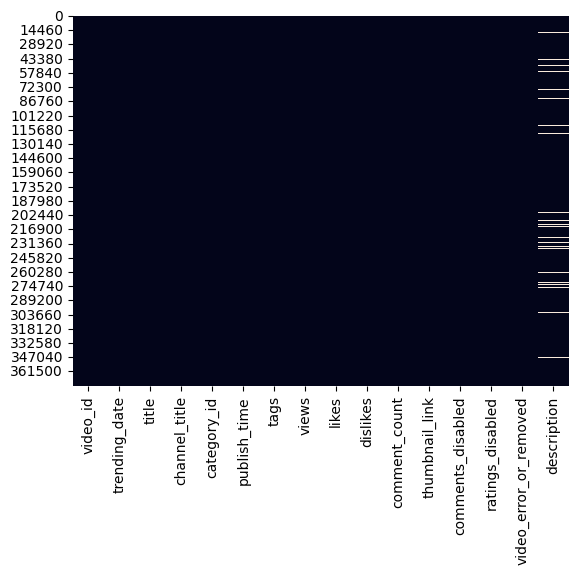

<Figure size 640x480 with 0 Axes>

In [12]:
# Vẽ biểu đồ thể hiện dữ liệu khuyết thiếu
sns.heatmap(videos.isnull(), cbar=False)
plt.figure()
plt.show()

In [13]:
# Hàm xóa dữ liệu trùng
def drop_data_duplicates(df):
    df = df.drop_duplicates(keep='first')
    del_cols = ['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']
    df = df.drop(del_cols, axis=1)
    return df

In [14]:
# Thực hiện xóa dữ liệu trùng
videos = drop_data_duplicates(videos)

In [15]:
# Kiểm tra sau xóa
videos.head(100)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067
...,...,...,...,...,...,...,...,...,...,...,...
95,zxuvr9tN924,2017-11-14,éè¯å¿æ° å®æ´ç âå°æ±äºæâäº®ç...,æ±èå«è§å®æ¹é¢éChina JiangsuTV Offici...,24,2017-11-11 16:00:04+00:00,"æ±èå«è§|""éè¯å¿æ°""|""å§æ¯å®""|""å­é...",150974,220,65,201
96,dKBThyjj0J0,2017-11-14,'Helping People' Sneak Peek Ep. 805 | The Walk...,amc,24,2017-11-13 03:00:01+00:00,"The Walking Dead|""episode 805""|""episode 5""|""Th...",70448,1538,25,315
97,pQgPR2V6924,2017-11-14,ãæèä¸çå¨å ±ãç¾åªçé ¸å·æ®ãå...,æèçä¸çå¨å ± Sisy's World News,25,2017-11-12 07:09:51+00:00,"é³æè|""æèä¸çå¨å ±""|""æèä¸çè²...",135620,379,86,449
98,lHcXhBojpeQ,2017-11-14,ä¸å±TVBè¦å¸ï¼ææ£10å¹´éæ¢ ç«¹é¦¬é«®å¦...,ææç¾æç,22,2017-11-12 12:49:50+00:00,[none],88061,47,58,17


In [16]:
# Tên các file json
filejson = ['CA_category_id.json', 'DE_category_id.json', 'FR_category_id.json', 'GB_category_id.json', 'IN_category_id.json',
            'JP_category_id.json', 'KR_category_id.json', 'MX_category_id.json', 'RU_category_id.json', 'US_category_id.json']

In [17]:
# Hàm lấy tên category
def find_category_id(files):
    category_id = {}
    for file in files:
        with open(path + file, 'r') as f:
            d = json.load(f)
            for category in d['items']:
                category_id[int(category['id'])] = category['snippet']['title']
    return category_id

In [18]:
# Tổng hợp tên các category ứng với category_id
category_id = find_category_id(filejson)
pprint(category_id)

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}


In [19]:
# Thực hiện thêm cột category
videos.insert(2, 'category', videos['category_id'].map(category_id))

In [20]:
# Kiểm tra sau thêm
videos.head(5)

,video_id,trending_date,category,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,n1WpP7iowLc,2017-11-14,Music,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882
1,0dBIkQ4Mz1M,2017-11-14,Comedy,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030
2,5qpjK5DgCt4,2017-11-14,Comedy,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181
3,d380meD0W0M,2017-11-14,Entertainment,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518
4,2Vv-BfVoq4g,2017-11-14,Music,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067


In [21]:
# Thêm cột category vào từng dữ liệu gốc
for i in range(10):
    dfs[i].insert(2, 'category', dfs[i]['category_id'].map(category_id))

In [22]:
print(dfs[0])

          video_id trending_date         category  \
0      n1WpP7iowLc      17.14.11            Music   
1      0dBIkQ4Mz1M      17.14.11           Comedy   
2      5qpjK5DgCt4      17.14.11           Comedy   
3      d380meD0W0M      17.14.11    Entertainment   
4      2Vv-BfVoq4g      17.14.11            Music   
...            ...           ...              ...   
40876  sGolxsMSGfQ      18.14.06    Entertainment   
40877  8HNuRNi8t70      18.14.06    Entertainment   
40878  GWlKEM3m2EE      18.14.06           Gaming   
40879  lbMKLzQ4cNQ      18.14.06  News & Politics   
40880  POTgw38-m58      18.14.06    Entertainment   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...

In [23]:
print(videos)

           video_id trending_date          category  \
0       n1WpP7iowLc    2017-11-14             Music   
1       0dBIkQ4Mz1M    2017-11-14            Comedy   
2       5qpjK5DgCt4    2017-11-14            Comedy   
3       d380meD0W0M    2017-11-14     Entertainment   
4       2Vv-BfVoq4g    2017-11-14             Music   
...             ...           ...               ...   
375936  1PhPYr_9zRY    2018-06-14    People & Blogs   
375938  1h7KV2sjUWY    2018-06-14    People & Blogs   
375939  D6Oy4LfoqsU    2018-06-14     Entertainment   
375940  oV0zkMe1K8s    2018-06-14  Film & Animation   
375941  ooyjaVdt-jA    2018-06-14            Gaming   

                                                    title  \
0             Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                           PLUSH - Bad Unboxing Fan Mail   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                                I Dare You: GOING BALD!?   
4             Ed Sheeran - Perfect

<Axes: xlabel='ratio', ylabel='category'>

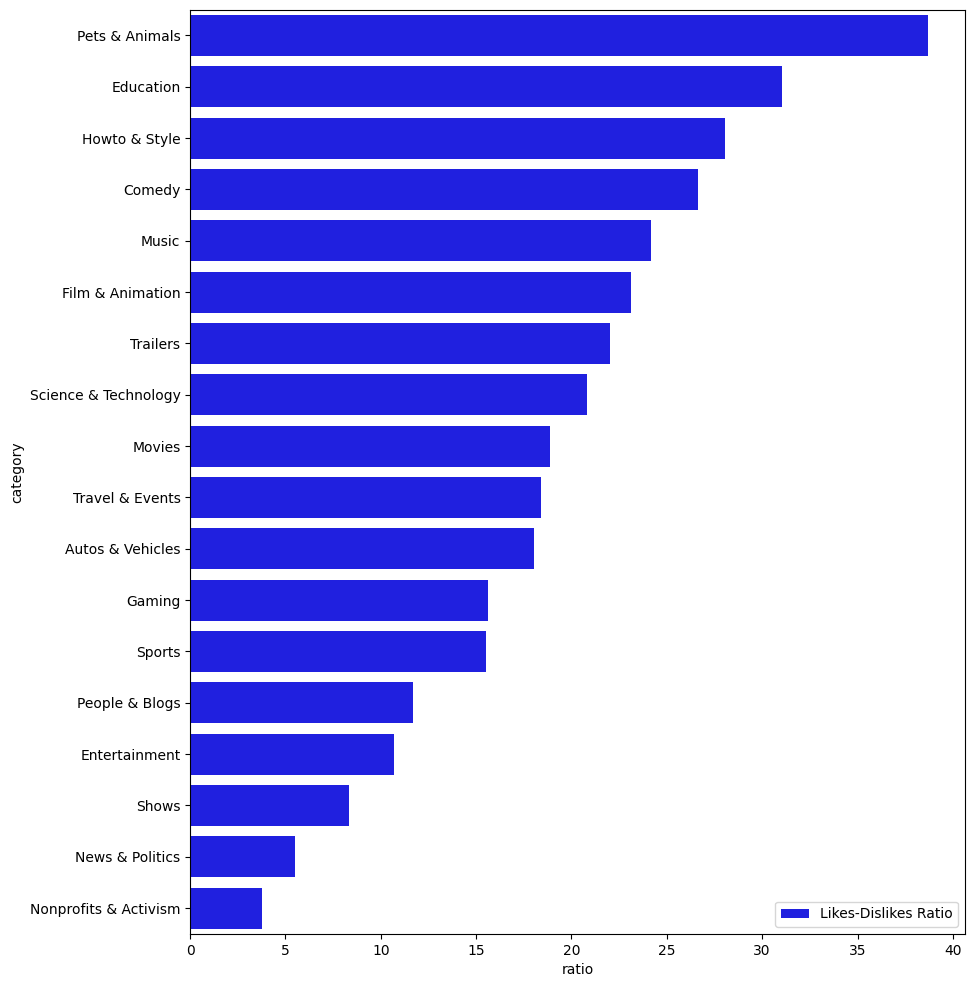

In [24]:
# Vẽ biểu đồ thể hiện tỉ lệ thích và không thích
# Tính lượt thích
likesdf = videos.groupby('category')['likes'].agg('sum')
# Tính lượt không thích
dislikesdf = videos.groupby('category')['dislikes'].agg('sum')
# Tính tỉ lệ
ratiodf = likesdf/dislikesdf
# Sắp xếp
ratiodf = ratiodf.sort_values(ascending=False).reset_index()
ratiodf.columns = ['category', 'ratio']
# Vẽ biểu đồ
plt.subplots(figsize=(10, 12))
sns.barplot(x="ratio", y="category", data=ratiodf, label="Likes-Dislikes Ratio", color="b")

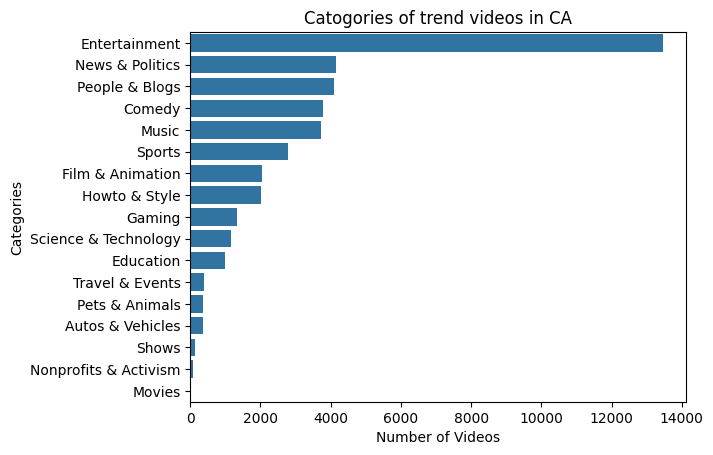

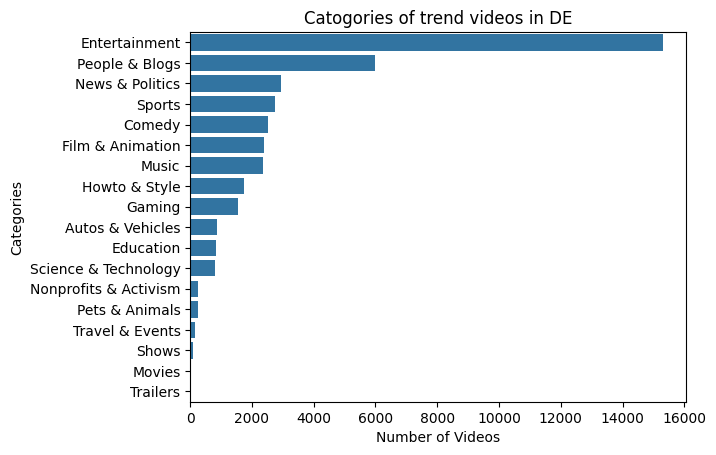

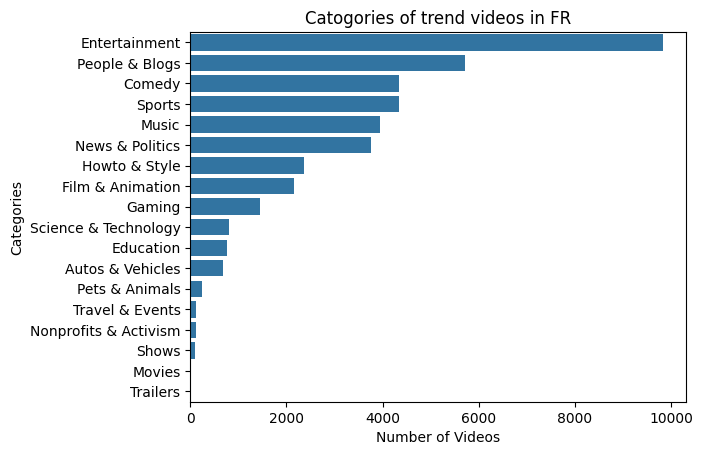

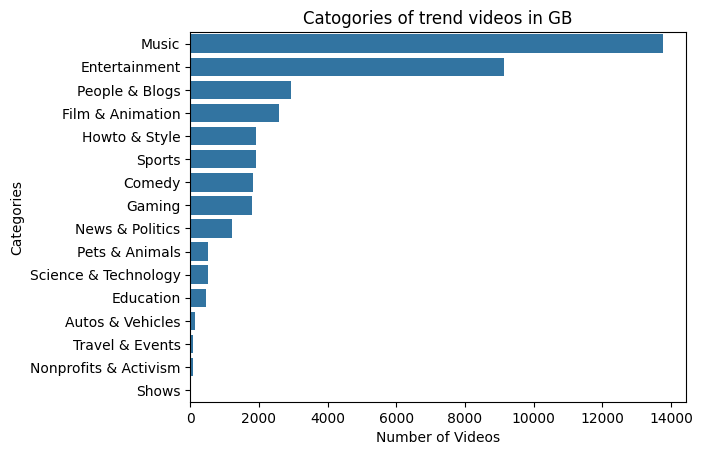

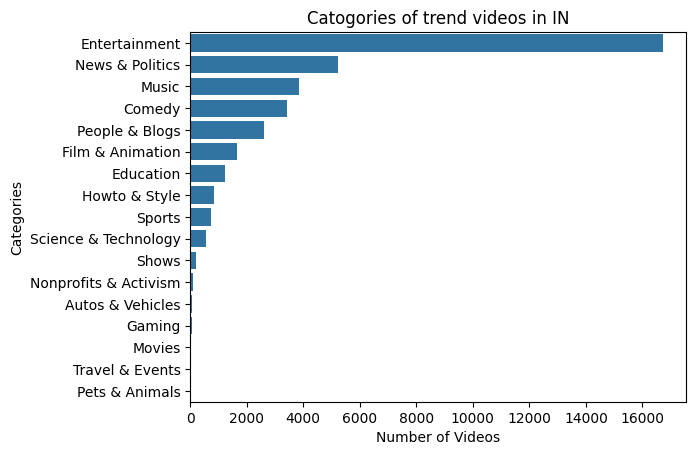

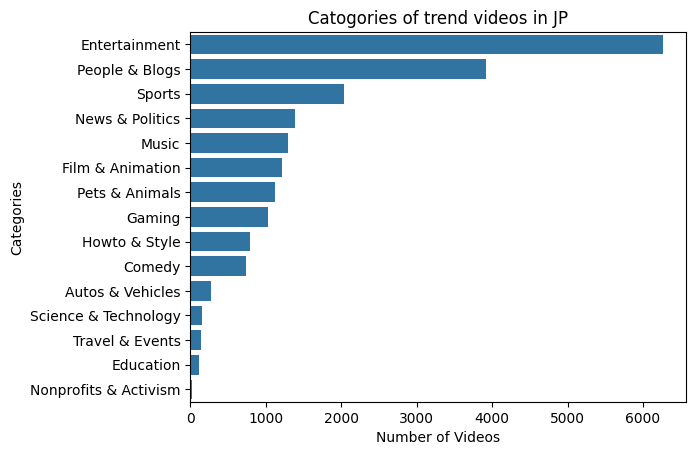

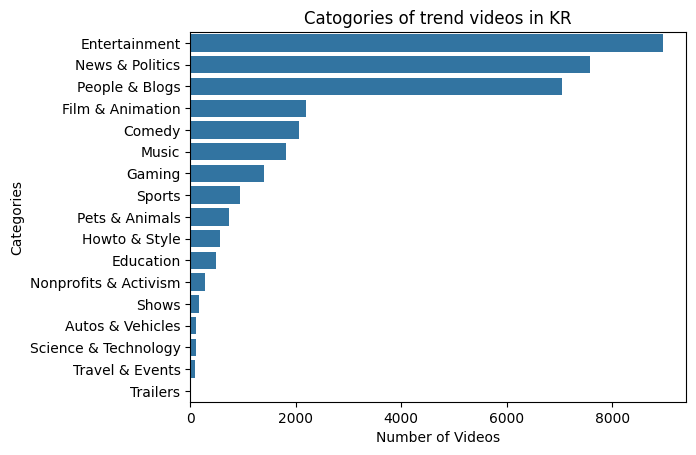

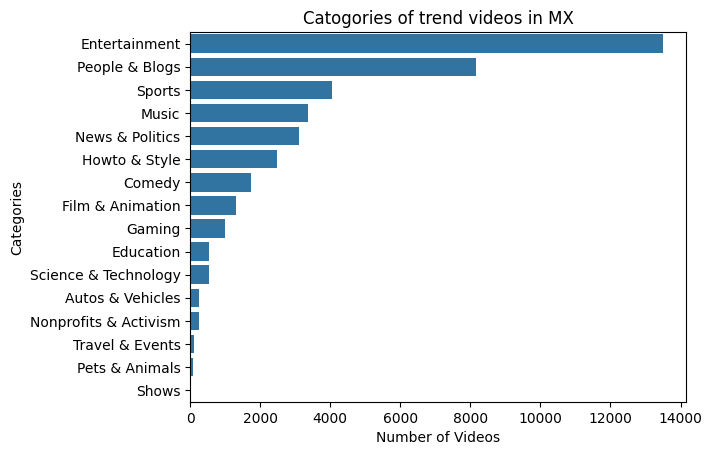

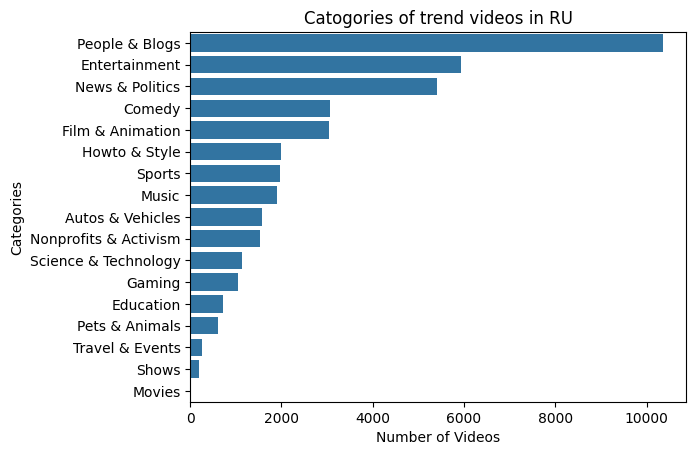

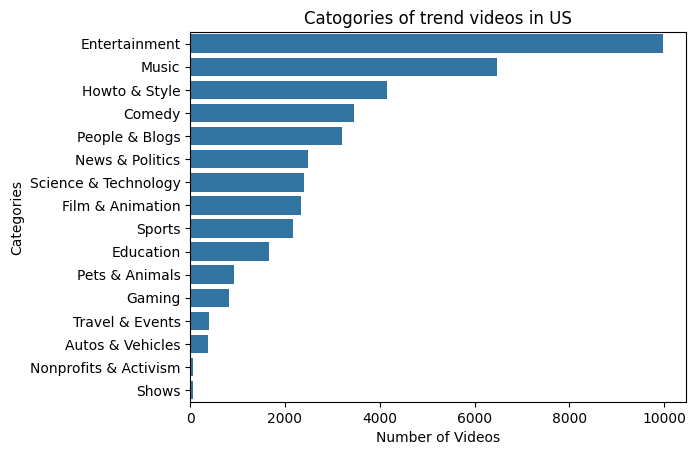

<Figure size 640x480 with 0 Axes>

In [25]:
# Thực hiện vẽ biểu đồ các nội dung được quan tâm nhất
for i in range(10):
    tempdf = dfs[i]['category'].value_counts().reset_index()
    ax = sns.barplot(y=tempdf.values[:, 0], x=tempdf.values[:, 1], data=tempdf, orient='h')
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title("Catogories of trend videos in " + filecsv[i][:2])
    plt.figure()

In [26]:
# Kiểm tra các video có lượt xem cao nhất
temporary = []
for df in dfs:
    temp = df
    temp = temp.reset_index().sort_values(by=['views'], ascending=False)
    temp.drop_duplicates(subset="video_id", keep='first', inplace=True)
    temp.set_index('video_id')
    temp = temp.head(5)
    temporary.append(temp)

In [27]:
# Top 5
print(f"Top 5 views tại {filecsv[0][:2]}")
temporary[0][['title', 'channel_title', 'category', 'views', 'likes']]

Top 5 views tại CA


,title,channel_title,category,views,likes
5900,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,137843120,3014479
34361,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,98938809,3037318
4699,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606665
36453,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,80738011,5053338
22029,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,61163906,629164


In [28]:
# Top 5
print(f"Top 5 views tại {filecsv[2][:2]}")
temporary[2][['title', 'channel_title', 'category', 'views', 'likes']]

Top 5 views tại FR


,title,channel_title,category,views,likes
5342,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100911567,2656682
35902,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,65396157,4750254
33720,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,60776509,2183745
1598,"Luis Fonsi, Demi Lovato - Ãchame La Culpa",LuisFonsiVEVO,Music,47078714,1763400
16877,To Our Daughter,Kylie Jenner,People & Blogs,44818108,0


In [29]:
# Top 5
print(f"Top 5 views tại {filecsv[4][:2]}")
temporary[4][['title', 'channel_title', 'category', 'views', 'likes']]

Top 5 views tại IN


,title,channel_title,category,views,likes
5408,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,125432237,2912710
4477,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606663
29298,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,53822757,1250535
22949,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,45064699,1494997
29668,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,44171797,780895


In [30]:
# Kiểm tra các video có lượt like nhiều nhất
temporary = []
for df in dfs:
    temp = df
    temp = temp.reset_index().sort_values(by=['likes'], ascending=False)
    temp.drop_duplicates(subset="video_id", keep='first', inplace=True)
    temp.set_index('video_id')
    temp = temp.head(5)
    temporary.append(temp)

In [31]:
# Top 5
print(f"Top 5 likes tại {filecsv[0][:2]}")
temporary[0][['views', 'likes']]

Top 5 likes tại CA


,views,likes
36453,80738011,5053338
34361,98938809,3037318
5900,137843120,3014479
4699,89930713,2606665
2873,27670973,2542863


In [32]:
# Top 5
print(f"Top 5 likes tại {filecsv[3][:2]}")
temporary[3][['views', 'likes']]

Top 5 likes tại GB


,views,likes
36638,123010920,5613827
38401,259721696,5444541
25936,258164991,4737873
25545,328860380,3823879
35720,208876887,3394437


In [33]:
# Top 5
print(f"Top 5 likes tại {filecsv[6][:2]}")
temporary[6][['views', 'likes']]

Top 5 likes tại KR


,views,likes
30844,87430865,5150839
4856,113876217,2811223
2788,30583293,2611254
4018,87450245,2584675
28605,22612931,2533784


In [34]:
# Kiểm tra sự tương quan giữa các thuộc tính lượt xem, lượt thích, lượt không thích, lượt bình luận
cols = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = videos[cols].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.779531,0.405428,0.489637
likes,0.779531,1.000000,0.451809,0.763874
dislikes,0.405428,0.451809,1.000000,0.747915
comment_count,0.489637,0.763874,0.747915,1.000000


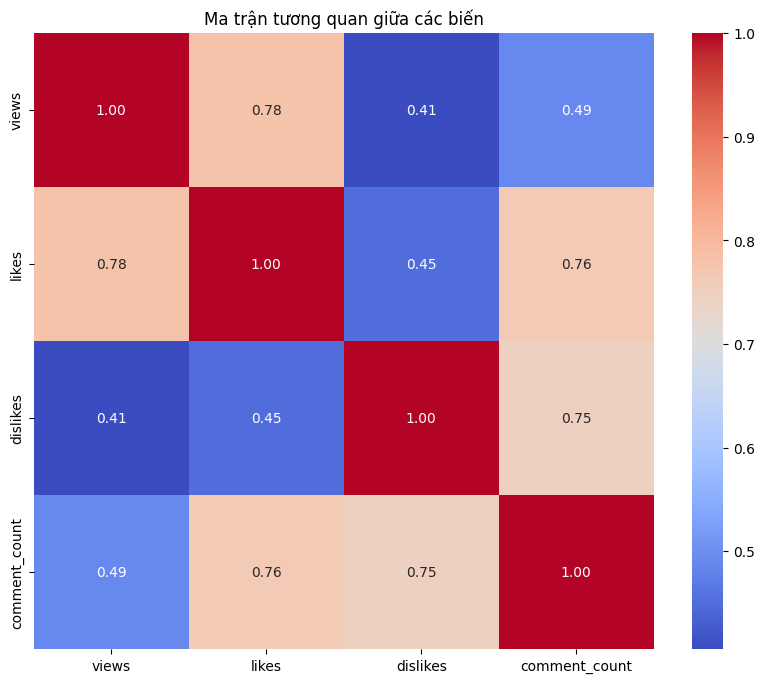

In [35]:
# Vẽ biểu đồ nhiệt thể hiện sự tương quan giữa các thuộc tính lượt xem, lượt thích, lượt không thích, lượt bình luận
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các biến")
plt.show()

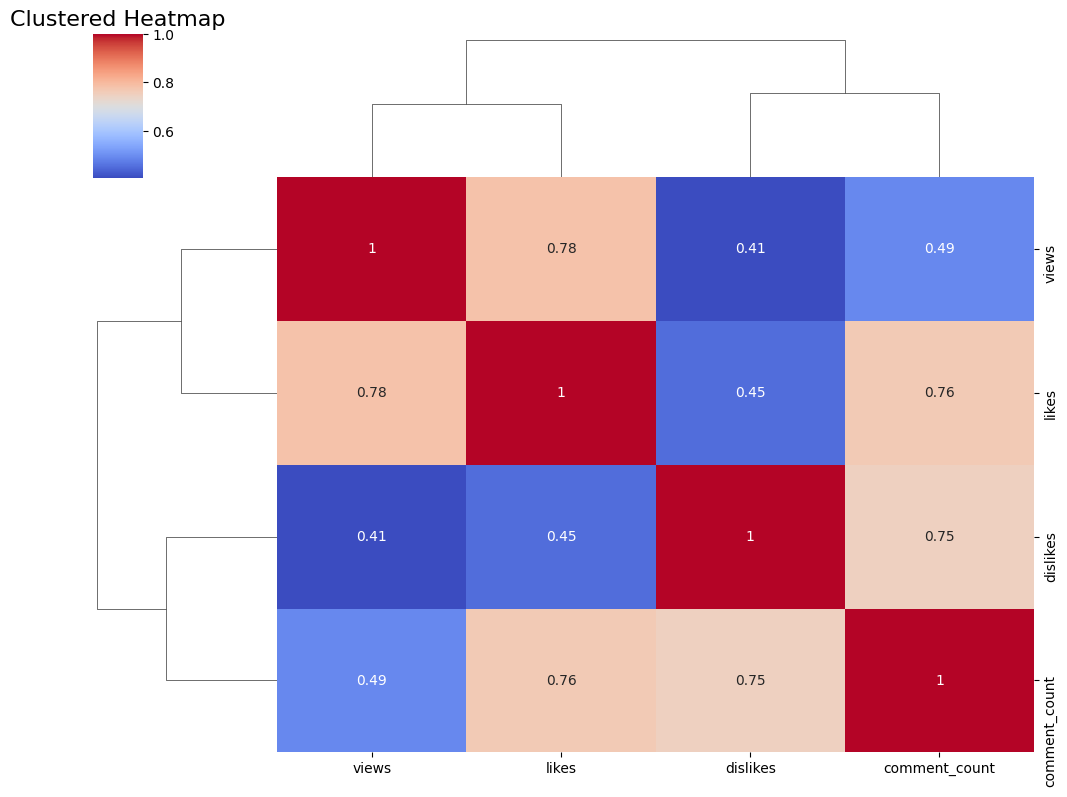

In [36]:
# Vẽ biểu đồ Clustermap
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, figsize=(10, 8))
plt.title("Clustered Heatmap", fontsize=16)
plt.show()

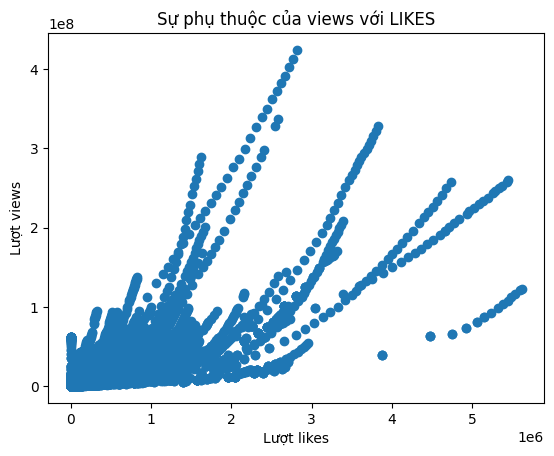

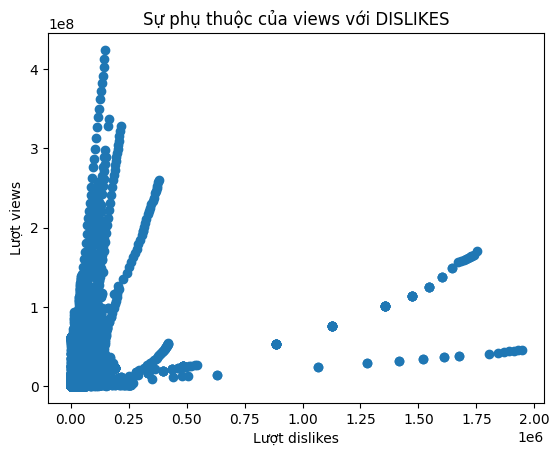

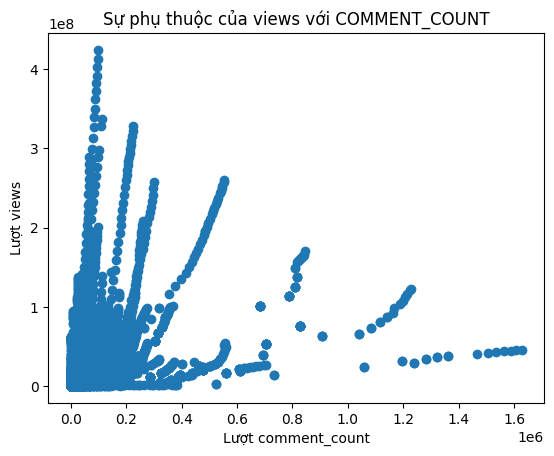

In [37]:
# Vẽ biểu đồ Scatter thể hiện sự tương quan giữa views và 'likes', 'dislikes', 'comment_count'
cols = ['views', 'likes', 'dislikes', 'comment_count']
for col in cols[1:]:
    x = videos[col]
    y = videos['views']
    plt.scatter(x, y)
    plt.title(f"Sự phụ thuộc của views với {str(col).upper()}")
    plt.xlabel(f"Lượt {col}")
    plt.ylabel("Lượt views")
    plt.show()

In [38]:
# Sắp xếp sự tương quan
views_corr = corr_matrix['views'].sort_values(ascending=False)
print("Các yếu tố ảnh hưởng đến lượt xem:")
print(views_corr)

Các yếu tố ảnh hưởng đến lượt xem:
views            1.000000
likes            0.779531
comment_count    0.489637
dislikes         0.405428
Name: views, dtype: float64


In [39]:
# Biến độc lập: likes, dislikes. Biến mục tiêu: views
X1 = videos[['likes', 'dislikes']]
y1 = videos['views']

In [40]:
# Thực hiện chia 80% train, 20% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=True)

In [41]:
# Khởi tạo model
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [42]:
# In phương trình hồi quy
print(f"Phương trình hồi quy là: Y = {model1.coef_[0]}X1 + {model1.coef_[1]}X2 + {model1.intercept_}")

Phương trình hồi quy là: Y = 34.652365759639814X1 + 20.694400158532904X2 + -9877.474385372829


In [43]:
# Biến độc lập: likes. Biến mục tiêu: views
X2 = videos[['likes']]
y2 = videos['views']

In [44]:
# Thực hiện chia 80% train, 20% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, shuffle=True)

In [45]:
# Khởi tạo model
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [46]:
# In phương trình hồi quy
print(f"Phương trình hồi quy là: Y = {model2.coef_[0]}X + {model2.intercept_}")

Phương trình hồi quy là: Y = 36.0440231316642X + -16564.25490031438


In [47]:
# Lưu model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump((model2, model1), f)

In [48]:
# Dự đoán trên tập test
y_pred1 = model1.predict(X_test1)

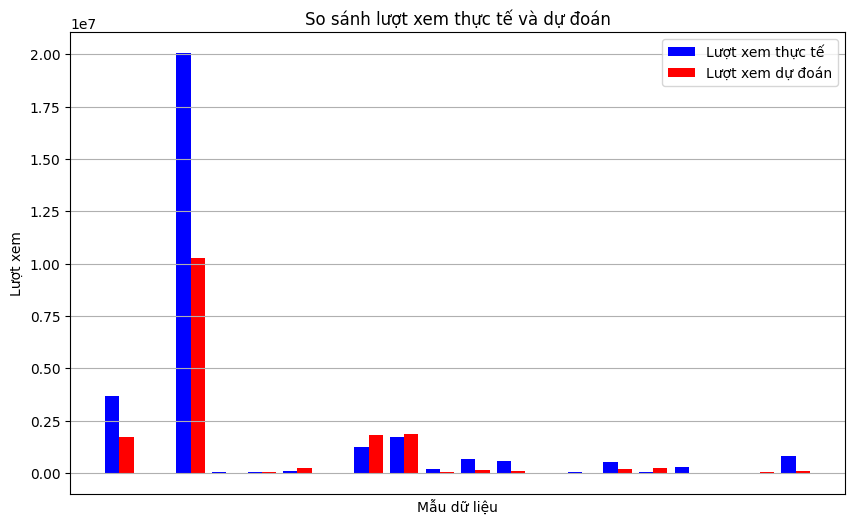

In [49]:
import numpy as np

# Tạo vị trí cột
x = np.arange(20)
width = 0.4

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, y_test1[95: 115], width, label="Lượt xem thực tế", color='blue')
plt.bar(x + width/2, y_pred1[95: 115], width, label="Lượt xem dự đoán", color='red')

# Thêm nhãn và tiêu đề
plt.xlabel("Mẫu dữ liệu")
plt.ylabel("Lượt xem")
plt.title("So sánh lượt xem thực tế và dự đoán")
plt.xticks(x[95: 115], [f"Mẫu {i+1}" for i in x[95: 115]])  # Nhãn cho trục x
plt.legend()
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()



In [50]:
#Hàm đánh giá mô hình qua tập train và test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
def evaluate(X_train, X_test, y_train, y_test, model):
    # Dự đoán trên mô hình đã học
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Tính R2 scores
    train_accuracy = r2_score(y_train, train_predictions)
    test_accuracy = r2_score(y_test, test_predictions)

    print(f'\nFinal Training Accuracy: {train_accuracy*100:.2f}%')
    print(f'Final Test Accuracy: {test_accuracy*100:.2f}%')

    # Tính MAPE
    train_mape = mean_absolute_percentage_error(y_train, train_predictions)
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)

    print(f'Train MAPE: {train_mape:.2f}%')
    print(f'Test MAPE: {test_mape:.2f}%')

    # Tính MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    print(f'Train MAE: {train_mae:.2f}')
    print(f'Test MAE: {test_mae:.2f}')

    # Tính MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f'Train MSE: {train_mse:.2f}')
    print(f'Test MSE: {test_mse:.2f}')

    # Tính RMSE
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    print(f'Train RMSE: {train_rmse:.2f}')
    print(f'Test RMSE: {test_rmse:.2f}')

In [51]:
# Đánh giá model 2 biến độc lập
evaluate(X_train1, X_test1, y_train1, y_test1, model1)


Final Training Accuracy: 60.45%
Final Test Accuracy: 63.73%
Train MAPE: 1.06%
Test MAPE: 1.06%
Train MAE: 782185.71
Test MAE: 779662.05
Train MSE: 19648495634983.74
Test MSE: 18577658001304.57
Train RMSE: 4432662.36
Test RMSE: 4310180.74


In [52]:
# Đánh giá model 1 biến độc lập
evaluate(X_train2, X_test2, y_train2, y_test2, model2)


Final Training Accuracy: 60.09%
Final Test Accuracy: 63.37%
Train MAPE: 1.20%
Test MAPE: 1.21%
Train MAE: 795384.46
Test MAE: 792926.98
Train MSE: 19824713263322.25
Test MSE: 18762301123365.36
Train RMSE: 4452495.17
Test RMSE: 4331547.20


In [53]:
# Đánh giá với 10 Fold
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Số folds
k = 10

# Chuẩn bị dữ liệu
X = videos[['likes', 'comment_count']].values
y = videos['views'].values

# Tạo mô hình 10-Fold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lưu trữ kết quả R²
r2_scores = []

for train_index, test_index in kf.split(X):
    # Chia tập huấn luyện và tập kiểm tra
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá hiệu suất bằng R²
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Tính trung bình R²
average_r2 = np.mean(r2_scores)

# In kết quả
print(f"R² trung bình qua {k}-Fold: {average_r2:.4f}")


R² trung bình qua 10-Fold Cross-Validation: 0.6322


In [54]:
# Thử nghiệm với mô hình GradientBoosting
param_grid = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'min_samples_split': 10
}
modelg = GradientBoostingRegressor(loss='squared_error', random_state=42, **param_grid)

In [55]:
modelg.fit(X_train1, y_train1)

GradientBoostingRegressor(max_depth=6, min_samples_split=10, random_state=42)

In [56]:
# Đánh giá mô hình GradientBoosting
evaluate(X_train1, X_test1, y_train1, y_test1, modelg)


Final Training Accuracy: 89.12%
Final Test Accuracy: 77.84%
Train MAPE: 2.35%
Test MAPE: 2.39%
Train MAE: 538712.37
Test MAE: 589742.49
Train MSE: 5406232215442.72
Test MSE: 11350902044264.66
Train RMSE: 2325130.58
Test RMSE: 3369109.98
